In [1]:
import numpy as np
from scipy import stats
import math
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import savgol_filter

In [4]:
pi_digits = np.load("../data/iteration1_int.npz")

In [5]:
list(pi_digits)

['arr_0']

In [6]:
pi_million_digits = list(pi_digits['arr_0'])[1:1000001]

In [7]:
def P(num_of_groups):
    res = []
    for k in range(1, num_of_groups+1):
        res.append(math.log(1+1/(k*(k+2)))/math.log(2))
    res.append(1-sum(res))
    return res

def Y(num_of_groups, pi_million_digits):
    Y = [0] * (num_of_groups+1)
    for digit in pi_million_digits:
        if digit > num_of_groups:
            Y[-1] += 1
        else:
            Y[digit-1] += 1
    return Y

def chisquare_test(Y, n, P, k):
    Q = 0
    for i in range(k):
        Q += ((Y[i] - n*P[i])**2)/(n*P[i])
    return Q

In [8]:
n = len(pi_million_digits)
k = 11 # number of groups

In [9]:
y_array = Y(k-1, pi_million_digits)
p_array = P(k-1)
q_res = chisquare_test(y_array, n, p_array, k)
p_val = 1 - stats.chi2.cdf(q_res , k-1)

In [10]:
p_val

0.163317326821394

In [11]:
q_res

14.21710022950165

In [12]:
y_array

[414527,
 170765,
 92955,
 58580,
 40859,
 29883,
 22694,
 17647,
 14435,
 12092,
 125563]

In [14]:
y_array_prod = [y/1000000 for y in y_array]

In [15]:
y_array_prod

[0.414527,
 0.170765,
 0.092955,
 0.05858,
 0.040859,
 0.029883,
 0.022694,
 0.017647,
 0.014435,
 0.012092,
 0.125563]

In [13]:
p_array

[0.4150374992788437,
 0.16992500144231237,
 0.09310940439148147,
 0.05889368905356862,
 0.04064198449734577,
 0.029747343394051932,
 0.02272007650008345,
 0.017921907997262315,
 0.01449956969511517,
 0.01197264166607594,
 0.1255308820838592]

## comparing different splits of the digits of pi

In [11]:
pi_10_million_digits = list(pi_digits['arr_0'])[1:10000001]

In [12]:
p_val_arr = []
q_res_arr = []
n = 1000000
k = 11 # number of groups
groups = list(np.array_split(pi_10_million_digits, 10))
for pi_million_digits in groups:
    pi_million_digits = list(pi_million_digits)
    y_array = Y(k-1, pi_million_digits)
    p_array = P(k-1)
    q_res = chisquare_test(y_array, n, p_array, k)
    p_val = 1 - stats.chi2.cdf(q_res , k-1)
    p_val_arr.append(p_val)
    q_res_arr.append(q_res)

In [13]:
p_val_arr

[0.163317326821394,
 0.41723136761137947,
 0.769171776069191,
 0.9946965274927771,
 0.988806237118358,
 0.09961448516754245,
 0.15877332297584423,
 0.8879619700472958,
 0.6356558470903804,
 0.5153723438673805]

In [14]:
q_res_arr

[14.21710022950165,
 10.268849438264558,
 6.5274930780594085,
 2.1869041929422957,
 2.632187668841219,
 16.000625886637867,
 14.32272875309117,
 5.047802291514476,
 7.930190195331557,
 9.177211228116779]

## Pairs of digits (a,b) 

In [15]:
pi_million_digits = pi_10_million_digits[:1000000]

In [30]:
pairs = defaultdict(int)
for a, b in zip(pi_10_million_digits[:-1], pi_10_million_digits[1:]):
    if a <=5 and b <= 5:
        pairs[(a, b)] += 1
    else:
        pairs['else'] += 1

In [31]:
len(pairs)

26

In [50]:
def P_pair(limit):
    res = []
    for i in range(1, limit+1):
        for j in range(1, limit+1):
            num = ((i * j) + i + j + 2)*((i * j)+1)
            den = ((i * j) + i + 1)*((i * j) + j + 1)
            #print(num, den)
            res.append(math.log((num/den))/math.log(2))
    res.append(1 - sum(res))
    return res

In [51]:
def Y_pair(pairs, limit):
    y = []
    for i in range(1, limit+1):
        for j in range(1, limit+1):
            y.append(pairs[(i, j)])
    y.append(pairs['else'])
    return y

In [49]:
p_arr_pair = P_pair()

In [65]:
y_arr_pair = Y_pair(pairs)

In [70]:
q_res = chisquare_test(y_arr_pair, 10000000, p_arr_pair, 26)
p_val = 1 - stats.chi2.cdf(q_res , 25)

In [71]:
p_val

0.6006497296581867

In [72]:
q_res

22.604434062295034

## Pairs of (a,b) where a and b are $\in$ [1, limit]

In [48]:
pi_30_million_digits = list(pi_digits['arr_0'])[1:30000001]

In [54]:
p_val_arr = []
q_res_arr = []
n = 100000

limit = 9
k = (limit * limit) + 1 # number of groups
groups = list(np.array_split(pi_30_million_digits, 300))
for pi_million_digits in tqdm(groups):
    pi_million_digits = list(pi_million_digits)
    pairs = defaultdict(int)
    for a, b in zip(pi_million_digits[:-1], pi_million_digits[1:]):
        if a <=limit and b <= limit:
            pairs[(a, b)] += 1
        else:
            pairs['else'] += 1
    y_array = Y_pair(pairs, limit)
    p_array = P_pair(limit)
    q_res = chisquare_test(y_array, n, p_array, k)
    p_val = 1 - stats.chi2.cdf(q_res , k-1)
    p_val_arr.append(p_val)
    q_res_arr.append(q_res)

100%|█████████████████████████████████████████| 300/300 [00:57<00:00,  5.20it/s]


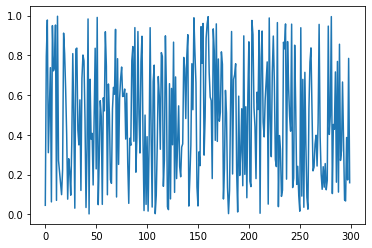

In [55]:
plt.plot(p_val_arr)

In [57]:
import numpy as np
import statsmodels.api as sm
import pylab as py

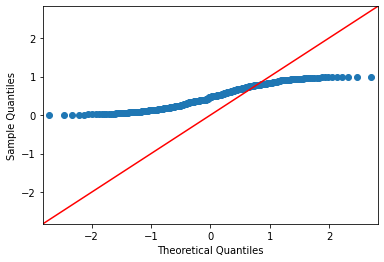

In [65]:
data_points = np.array(p_val_arr)    
  
sm.qqplot(data_points, line ='45')
py.show()

In [66]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.array(p_val_arr)   
stats.probplot(measurements, dist = stats.chi2.cdf(q_res_arr, df=4), plot=pylab)
pylab.show()

AttributeError: 'numpy.ndarray' object has no attribute 'ppf'

In [73]:
q = stats.chi2.pdf(q_res_arr, df=81)
q

array([0.00634998, 0.0245615 , 0.00523128, 0.02646542, 0.03161221,
       0.02753047, 0.00831216, 0.00982683, 0.02821189, 0.02752595,
       0.00940799, 0.00915115, 0.00106191, 0.02453801, 0.02129312,
       0.01746062, 0.01206642, 0.0218378 , 0.01465373, 0.02370795,
       0.03089078, 0.02977636, 0.00980031, 0.02500168, 0.0213394 ,
       0.01180264, 0.02830679, 0.02364936, 0.03147835, 0.00455915,
       0.02203629, 0.02168194, 0.03034514, 0.02806619, 0.03155666,
       0.01403231, 0.02953904, 0.02410717, 0.02585355, 0.03131565,
       0.00500216, 0.02733115, 0.00421605, 0.00036656, 0.02968779,
       0.02906324, 0.02990166, 0.01636659, 0.03138438, 0.02173272,
       0.02213233, 0.00254784, 0.00672613, 0.0252005 , 0.03158474,
       0.0314173 , 0.00690442, 0.03147629, 0.0316242 , 0.01387075,
       0.02717713, 0.01200542, 0.03033204, 0.03149923, 0.01841876,
       0.01702471, 0.03165764, 0.0307097 , 0.0312747 , 0.01237318,
       0.01090757, 0.02522685, 0.02347303, 0.03150471, 0.02959

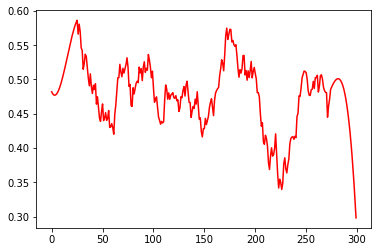

In [68]:
yhat = savgol_filter(p_val_arr, 51, 3) # window size 51, polynomial order 3
#plt.plot(p_val_arr)
plt.plot(yhat, color='red')
plt.show()

In [23]:
pairs_9 = defaultdict(int)
for a, b in zip(pi_10_million_digits[:-1], pi_10_million_digits[1:]):
    if a <=9 and b <= 9:
        pairs_9[(a, b)] += 1
    else:
        pairs_9['else'] += 1

In [24]:
pairs_9

defaultdict(int,
            {'else': 2609659,
             (1, 1): 1518214,
             (1, 2): 703169,
             (2, 1): 703972,
             (1, 3): 406009,
             (3, 1): 406435,
             (2, 2): 291105,
             (1, 4): 264626,
             (4, 2): 100526,
             (2, 6): 50397,
             (6, 6): 7839,
             (6, 3): 26300,
             (3, 5): 36022,
             (5, 1): 187026,
             (1, 6): 138647,
             (6, 8): 4625,
             (8, 1): 84256,
             (1, 7): 105865,
             (7, 1): 106114,
             (2, 3): 159354,
             (3, 7): 19892,
             (1, 8): 84214,
             (6, 1): 137713,
             (1, 5): 186436,
             (5, 2): 69400,
             (2, 4): 100234,
             (4, 4): 32653,
             (4, 1): 264164,
             (2, 5): 69390,
             (5, 4): 22003,
             (2, 8): 30278,
             (8, 2): 30505,
             (7, 3): 19773,
             (3, 3): 85075,
             

In [25]:
len(pairs_9)

82

In [27]:
pairs_9_percent = defaultdict(int)
for key, val in pairs_9.items():
    pairs_9_percent[key] = val/100000

In [28]:
pairs_9_percent

defaultdict(int,
            {'else': 26.09659,
             (1, 1): 15.18214,
             (1, 2): 7.03169,
             (2, 1): 7.03972,
             (1, 3): 4.06009,
             (3, 1): 4.06435,
             (2, 2): 2.91105,
             (1, 4): 2.64626,
             (4, 2): 1.00526,
             (2, 6): 0.50397,
             (6, 6): 0.07839,
             (6, 3): 0.263,
             (3, 5): 0.36022,
             (5, 1): 1.87026,
             (1, 6): 1.38647,
             (6, 8): 0.04625,
             (8, 1): 0.84256,
             (1, 7): 1.05865,
             (7, 1): 1.06114,
             (2, 3): 1.59354,
             (3, 7): 0.19892,
             (1, 8): 0.84214,
             (6, 1): 1.37713,
             (1, 5): 1.86436,
             (5, 2): 0.694,
             (2, 4): 1.00234,
             (4, 4): 0.32653,
             (4, 1): 2.64164,
             (2, 5): 0.6939,
             (5, 4): 0.22003,
             (2, 8): 0.30278,
             (8, 2): 0.30505,
             (7, 3): 0.197

In [74]:
all_digits = list(pi_digits['arr_0'])

In [76]:
len(all_digits)

349157461

In [77]:
pairs_9_all = defaultdict(int)
for a, b in zip(all_digits[:-1], all_digits[1:]):
    if a <=9 and b <= 9:
        pairs_9_all[(a, b)] += 1
    else:
        pairs_9_all['else'] += 1

In [78]:
pairs_9_all_percent = defaultdict(int)
for key, val in pairs_9_all.items():
    pairs_9_all_percent[key] = (val/len(all_digits))*100

In [79]:
pairs_9_all

defaultdict(int,
            {(0, 7): 1,
             'else': 91006419,
             (1, 1): 53054688,
             (1, 2): 24579862,
             (2, 1): 24580449,
             (1, 3): 14191435,
             (3, 1): 14189865,
             (2, 2): 10175548,
             (1, 4): 9239484,
             (4, 2): 3510285,
             (2, 6): 1764369,
             (6, 6): 272401,
             (6, 3): 915795,
             (3, 5): 1261146,
             (5, 1): 6501426,
             (1, 6): 4821403,
             (6, 8): 159926,
             (8, 1): 2953495,
             (1, 7): 3717574,
             (7, 1): 3717571,
             (2, 3): 5569465,
             (3, 7): 694680,
             (1, 8): 2953978,
             (6, 1): 4822132,
             (1, 5): 6499818,
             (5, 2): 2416743,
             (2, 4): 3510372,
             (4, 4): 1141071,
             (4, 1): 9241182,
             (2, 5): 2417505,
             (5, 4): 773796,
             (2, 8): 1059698,
             (8, 2): 105985

In [80]:
pairs_9_all_percent

defaultdict(int,
            {(0, 7): 2.864037323263729e-07,
             'else': 26.06457806725774,
             (1, 1): 15.195060660611231,
             (1, 2): 7.039764216867186,
             (2, 1): 7.039932335858061,
             (1, 3): 4.064479951067121,
             (3, 1): 4.064030297207368,
             (2, 2): 2.9143149256661594,
             (1, 4): 2.6462227023698057,
             (4, 2): 1.0053587255292822,
             (2, 6): 0.5053218668009503,
             (6, 6): 0.0780166630894363,
             (6, 3): 0.26228710604583066,
             (3, 5): 0.3611969214084759,
             (5, 1): 1.8620326718437215,
             (1, 6): 1.3808678142495714,
             (6, 8): 0.04580340329602752,
             (8, 1): 0.8458919914072809,
             (1, 7): 1.0647270687994834,
             (7, 1): 1.0647262095882866,
             (2, 3): 1.5951155630611027,
             (3, 7): 0.19895894477248477,
             (1, 8): 0.8460303244099946,
             (6, 1): 1.3810766025704375

In [84]:
for i in range(1, 10):
    for j in range(1, 10):
        if i != j:
            print((i, j), pairs_9_all_percent[(i, j)])
            print((j, i), pairs_9_all_percent[(j, i)])
            print("Difference: ", abs(pairs_9_all_percent[(i, j)]-pairs_9_all_percent[(j, i)]))
            print()

(1, 2) 7.039764216867186
(2, 1) 7.039932335858061
Difference:  0.00016811899087443294

(1, 3) 4.064479951067121
(3, 1) 4.064030297207368
Difference:  0.0004496538597527078

(1, 4) 2.6462227023698057
(4, 1) 2.646709015907296
Difference:  0.00048631353749017947

(1, 5) 1.8615721346421408
(5, 1) 1.8620326718437215
Difference:  0.0004605372015806797

(1, 6) 1.3808678142495714
(6, 1) 1.3810766025704375
Difference:  0.00020878832086612675

(1, 7) 1.0647270687994834
(7, 1) 1.0647262095882866
Difference:  8.592111968575011e-07

(1, 8) 0.8460303244099946
(8, 1) 0.8458919914072809
Difference:  0.00013833300271370863

(1, 9) 0.6888367767114678
(9, 1) 0.6891847572462443
Difference:  0.00034798053477647084

(2, 1) 7.039932335858061
(1, 2) 7.039764216867186
Difference:  0.00016811899087443294

(2, 3) 1.5951155630611027
(3, 2) 1.5946616131453655
Difference:  0.0004539499157372173

(2, 4) 1.0053836426539944
(4, 2) 1.0053587255292822
Difference:  2.4917124712198202e-05

(2, 5) 0.6923824549176681
(5, 2)